<img src="http://prody.csb.pitt.edu/_static/ubiquitin.png" align="left" width="55" height="55"> <h1>Prody Basics</h1>

This tutorial aims to teach basic data structures and functions in ProDy. 

First, we need to import required packages:

In [1]:
from prody import *
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline
confProDy(auto_show=False)
confProDy(auto_secondary=True)

@> ProDy is configured: auto_show=False
@> ProDy is configured: auto_secondary=True


These import commands will load numpy, matplotlib, and ProDy into the memory. `confProDy` is used to modify the default behaviors of ProDy. Here we turned off `auto_show` so that the plots can be made in the same figure, and we turn on `auto_secondary` to parse the secondary structure information whenever we load a PDB into ProDy. See [here](http://prody.csb.pitt.edu/manual/reference/prody.html?highlight=confprody#prody.confProDy) for a complete list of behaviors that can be changed by this function. This function only needs to be called once, and the setting will be remembered by ProDy.

### Loading PDB files and visualization

ProDy comes with many functions that can be used to fetch data from [Protein Data Bank](https://www.rcsb.org/).

The standard way to do this is with `parsePDB`, which will download a PDB file if needed and load it into a variable of a special data type called an `AtomGroup`:

In [2]:
p38 = parsePDB('1p38')
p38

@> PDB file is found in working directory (1p38.pdb).
@> 2962 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 188 residues.


<AtomGroup: 1p38 (2962 atoms)>

To visualize the structure, we do the following:

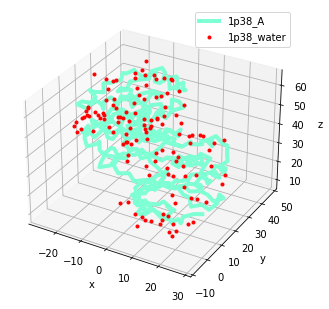

In [3]:
showProtein(p38);
legend();

If you would like to display the 3D structure using other packages or your own code, you can get the 3D coordinates via the `getCoords` method, which returns a NumPy ndarray:

In [4]:
coords = p38.getCoords()

In [5]:
coords.shape

(2962, 3)

We can also visualise the contact map as follows:

@> Kirchhoff was built in 0.01s.
D:\Programs\Anaconda3\envs\workshop\lib\site-packages\prody\utilities\catchall.py:597: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  ax3.xaxis.set_major_formatter(ticker.IndexFormatter(xticklabels))
D:\Programs\Anaconda3\envs\workshop\lib\site-packages\prody\utilities\catchall.py:599: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  ax3.yaxis.set_major_formatter(ticker.IndexFormatter(yticklabels))


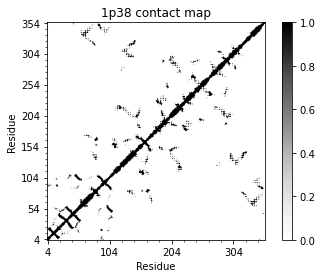

In [6]:
showContactMap(p38.ca);

An `AtomGroup` is essentially a collection of protein atoms. Each atom can be indexed/queried/found by the following way:

In [7]:
p38[10]

<Atom: CA from 1p38 (index 10)>

This will give you the **$11^{th}$** atom from `p38`, noting that Python index starts from **0**. We can also examine the spatial location of this atom by querying the coordinates, which we can also use to highlight this atom in a plot.

In [8]:
p38[10].getCoords()

array([24.179,  4.807, 21.907])

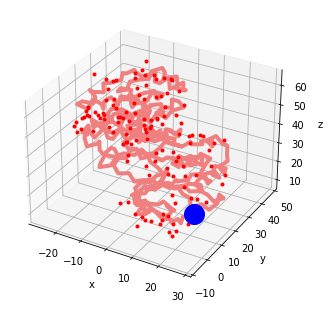

In [9]:
showProtein(p38);
ax3d = gca()
x, y, z = p38[10].getCoords()
ax3d.plot([x], [y], [z], 'bo', markersize=20);

We could select a chain, e.g. chain A, of the protein by indexing using its identifier, as follows:

In [10]:
p38['A']

<Chain: A from 1p38 (480 residues, 2962 atoms)>

In [11]:
p38['A'].getSequence()

'ERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKTGHRVAVKKLSRPFQSIIHAKRTYRELRLLKHMKHENVIGLLDVFTPARSLEEFNDVYLVTHLMGADLNNIVKCQKLTDDHVQFLIYQILRGLKYIHSADIIHRDLKPSNLAVNEDCELKILDFGLARHTDDEMTGYVATRWYRAPEIMLNWMHYNQTVDIWSVGCIMAELLTGRTLFPGTDHIDQLKLILRLVGTPGAELLKKISSESARNYIQSLAQMPKMNFANVFIGANPLAVDLLEKMLVLDSDKRITAAQALAHAYFAQYHDPDDEPVADPYDQSFESRDLLIDEWKSLTYDEVISFVPPPLD'

In many cases, it is more convenient to examine the structure with **[residue numbers](https://pdb101.rcsb.org/learn/guide-to-understanding-pdb-data/primary-sequences-and-the-pdb-format)**, and `AtomGroup` supports indexing with a chain ID and a residue number:

In [12]:
p38[10].getResnum()

5

In [13]:
p38['A', 5]

<Residue: ARG 5 from Chain A from 1p38 (11 atoms)>

This will give you the residue with the residue number of atom 10, which is an arginine in `p38`. Please note the difference between this line and the previous one. 

In [14]:
p38['A', 5].getNames()

array(['N', 'CA', 'C', 'O', 'CB', 'CG', 'CD', 'NE', 'CZ', 'NH1', 'NH2'],
      dtype='<U6')

Note that some ProDy objects may not support indexing using a chain identifier or a residue number. In such cases, we can first obtain a hierarchical view of the object:

In [15]:
hv = p38.getHierView()

And then use `HierView` to index with a chain identifier and residue number as it will always be supported:

In [16]:
hv['A', 5]

<Residue: ARG 5 from Chain A from 1p38 (11 atoms)>

### Retrieving data from an AtomGroup

Many properties of the protein can be acquired by functions named like "getxxx". For instance, we can obtain the B-factors by:

In [17]:
betas = p38.getBetas()
betas.shape

(2962,)

In this way, we can obtain the B-factor for every single atom. However, in some cases, we only need to know the B-factors of alpha-carbons. We have a shortcut for this:

In [18]:
p38.ca

<Selection: 'ca' from 1p38 (351 atoms)>

In [19]:
betas = p38.ca.getBetas()
betas.shape

(351,)

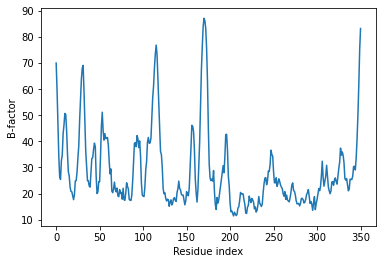

In [20]:
plot(betas);
ylabel('B-factor');
xlabel('Residue index');

If we would like to use residue numbers in the PDB, instead of the indices as the x-axis of the plot, it would be much more convenient to use the ProDy plotting function, `showAtomicLines`.

D:\Programs\Anaconda3\envs\workshop\lib\site-packages\prody\utilities\catchall.py:464: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  ax.get_xaxis().set_major_formatter(ticker.IndexFormatter(ticklabels))


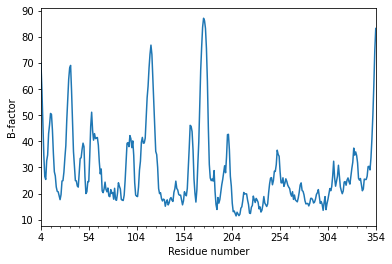

In [21]:
showAtomicLines(betas, atoms=p38.ca);
ylabel('B-factor');
xlabel('Residue number');

We can also obtain the secondary structure information as an array:

In [22]:
p38.ca.getSecstrs()

array(['C', 'C', 'C', 'C', 'E', 'E', 'E', 'E', 'E', 'E', 'C', 'C', 'E',
       'E', 'E', 'E', 'E', 'E', 'C', 'C', 'C', 'C', 'C', 'C', 'E', 'E',
       'E', 'E', 'C', 'C', 'C', 'C', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'C', 'C', 'C', 'C', 'C', 'C', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'C', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H',
       'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'E', 'E', 'E', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'E', 'E', 'E', 'E', 'E',
       'C', 'C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'C',
       'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H',
       'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'G', 'G', 'G', 'E', 'E', 'E', 'C',
       'C', 'C', 'C', 'C', 'E', 'E', 'E', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'H

To make it easier to read, we can convert the array into a string using the Python's built-in function, `join` :

In [23]:
''.join(p38.ca.getSecstrs())

'CCCCEEEEEECCEEEEEECCCCCCEEEECCCCEEEEEEECCCCCCEEEEEEECCCCCCHHHHHHHHHHHHHHHHCCCCCCCCCCEEECCCCCCCCCCCCEEEEECCCCCHHHHHHHCCCCHHHHHHHHHHHHHHHHHHHHHCCCCCCCCGGGEEECCCCCEEECCCCCCCCCCCCCCCCCHHHHHCCHHHHCCCCCCCGGGGGGGGGGGGGGGGGCCCCCCCCCHHHHHHHHHHHHCCCCHHHHHHCCCHHHHHHHHHCCCCCCCCGGGCCCCCCHHHHHHHHHHCCCCGGGCCCHHHHHCCGGGCCCCCGGGCCCCCCCCCGGGGCCCCHHHHHHHHHHHHHCCCCCCCC'

`C` is for coil, `H` for alpha helix, `I` for pi helix, `G` for 3-10 helix, and `E` for beta strand (sheet). 

To get a complete list of "get" functions, you can type `p38.get<TAB>`. We provide a cell for doing this here:

In [24]:
p38

<AtomGroup: 1p38 (2962 atoms)>

The [measure](http://prody.csb.pitt.edu/manual/reference/measure/index.html?highlight=measure#module-prody.measure) module contains various additional functions for calculations for structural properties. For example, you can calculate the phi angle of the 11th residue:

In [25]:
calcPhi(p38['A', 10])

-115.5351427673999

Note that the residue at the N-terminus or C-terminus does not have a Phi or Psi angle, respectively. 

If we calculate the Phi and Psi angle for every non-terminal residue, we can obtain a [Ramachandran plot](https://en.wikipedia.org/wiki/Ramachandran_plot) for a protein. An example of Ramachandran plot for human [PCNA](https://en.wikipedia.org/wiki/Proliferating_cell_nuclear_antigen) is shown below:
<img src="https://upload.wikimedia.org/wikipedia/commons/4/43/1axc_PCNA_ProCheck_Rama.jpg" align="bottom" width="300" height="300">

Three favored regions are shown in red -- **upper left: beta sheet; center left: alpha helix; center right: left-handed helix**. Each blue data point corresponds to the two dihedrals of a residue. We will reproduce this plot for ubiquitin (only the points).

In [26]:
chain = p38['A']
Phi = []; Psi = []; c = []
for res in chain.iterResidues():
    try:
        phi = calcPhi(res)
        psi = calcPsi(res)
    except:
        continue
    else:
        Phi.append(phi)
        Psi.append(psi)
        if res.getResname() == 'GLY':
            c.append('black')
        else:
            secstr = res.getSecstrs()[0]
            if secstr == 'H':
                c.append('red')
            elif secstr == 'G':
                c.append('darkred')
            elif secstr == 'E':
                c.append('blue')
            else:
                c.append('grey')

In the above code, we use an exception handler to exclude the terminal residues from the calculation.

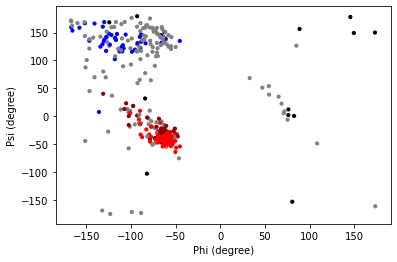

In [27]:
scatter(Phi, Psi, c=c, s=10);
xlabel('Phi (degree)');
ylabel('Psi (degree)');

### Selection

In theory you could retrieve any set of atoms by indexing the `AtomGroup`, but it would be cumbersome to do so. To make it more convienient, ProDy provides VMD-like syntax for selecting atoms. Here lists a few common selection strings. For a more complete tutorial on selection, please see [here](http://prody.csb.pitt.edu/tutorials/prody_tutorial/selection.html).

In [28]:
ca = p38.select('calpha')
ca

<Selection: 'calpha' from 1p38 (351 atoms)>

In [29]:
bb = p38.select('backbone')
bb

<Selection: 'backbone' from 1p38 (1404 atoms)>

We could also perform some simple selections right when the structure is being parsed. For example, we can specify that we would like to obtain only alpha-carbons of chain A of p38 as follows:

In [30]:
chainA_ca = parsePDB('1p38', chain='A', subset='ca')

@> PDB file is found in working directory (1p38.pdb).
@> 351 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> Secondary structures were assigned to 188 residues.


We could find the chain A using selection (as an alternative to the indexing method shown above):

In [31]:
chA = p38.select('calpha and chain A')
chA

<Selection: 'calpha and chain A' from 1p38 (351 atoms)>

Selection also works for finding a single residue or multiple residues:

In [32]:
res = p38.ca.select('chain A and resnum 10')
res.getResnums()

array([10])

In [33]:
res = p38.ca.select('chain A and resnum 10 11 12')
res.getResnums()

array([10, 11, 12])

In [34]:
head = p38.ca.select('resnum < 50')
head.numAtoms()

46

We can also select a range of residues as follows:

In [35]:
fragment = p38.ca.select('resnum 50 to 100')

If we have data associated to the full length of the protein, we can slice the data using the `sliceAtomicData`:

In [36]:
subbetas = sliceAtomicData(betas, atoms=p38.ca, select=fragment)

We can visualize the data of this range using `showAtomicLines`:

D:\Programs\Anaconda3\envs\workshop\lib\site-packages\prody\utilities\catchall.py:464: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  ax.get_xaxis().set_major_formatter(ticker.IndexFormatter(ticklabels))


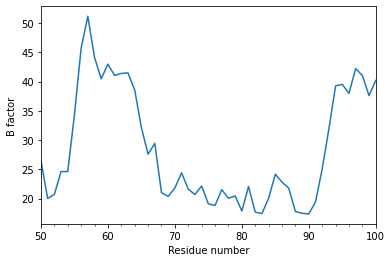

In [37]:
showAtomicLines(subbetas, atoms=fragment);
xlabel('Residue number');
ylabel('B factor');

Or highlight the subset in the plot of the whole protein:

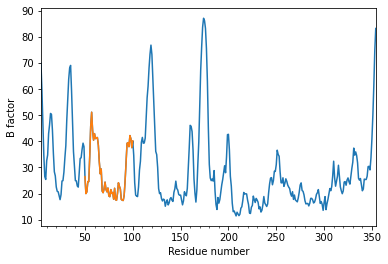

In [38]:
showAtomicLines(betas, atoms=p38.ca, overlay=True);
showAtomicLines(subbetas, atoms=fragment, overlay=True);
xlabel('Residue number');
ylabel('B factor');

Selection also allows us to extract particular amino acid types:

In [39]:
args = p38.ca.select('resname ARG')
args

<Selection: '(resname ARG) and (ca)' from 1p38 (19 atoms)>

Again, combined with `sliceAtomicData` and `showAtomicLines`, we can highlight these residues in the plot of the whole protein:

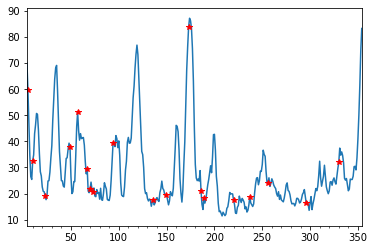

In [40]:
argbetas = sliceAtomicData(betas, atoms=p38.ca, select=args)
showAtomicLines(betas, atoms=p38.ca, overlay=True);
showAtomicLines(argbetas, atoms=args, linespec='r*', overlay=True);

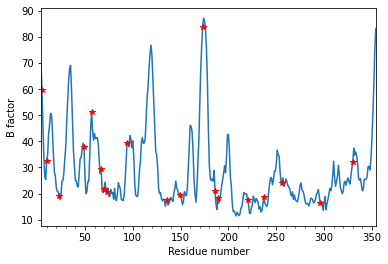

In [41]:
argbetas = sliceAtomicData(betas, atoms=p38.ca, select=args)
showAtomicLines(betas, atoms=p38.ca, overlay=True);
showAtomicLines(argbetas, atoms=args, linespec='r*', overlay=True);
xlabel('Residue number');
ylabel('B factor');

### Compare and align structures

You can also compare different structures using some of the methods in proteins module. Let’s parse another p38 MAP kinase structure. 

In [42]:
bound = parsePDB('1zz2')

@> PDB file is found in the local folder (D:\Box Sync\Biophys workshop 2020\pdbs\1zz2.pdb.gz).
@> 2872 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 220 residues.


You can find similar chains in structure 1p38 and 1zz2 using the `matchChains` function

In [43]:
results = matchChains(p38, bound)
results[0]

@> Checking AtomGroup 1p38: 1 chains are identified
@> Checking AtomGroup 1zz2: 1 chains are identified
@> Trying to match chains based on residue numbers and names:
@>   Comparing Chain A from 1p38 (len=351) and Chain A from 1zz2 (len=337):
@> 	Match: 337 residues match with 99% sequence identity and 96% overlap.


(<AtomMap: Chain A from 1p38 -> Chain A from 1zz2 from 1p38 (337 atoms)>,
 <AtomMap: Chain A from 1zz2 -> Chain A from 1p38 from 1zz2 (337 atoms)>,
 99.40652818991099,
 96.01139601139602)

In Python, a tuple (or any indexable objects) can be unpacked as follows:

In [44]:
apo_chA, bnd_chA, seqid, overlap = results[0]


The first two terms are the mapping of the proteins to each other,

In [45]:
apo_chA

<AtomMap: Chain A from 1p38 -> Chain A from 1zz2 from 1p38 (337 atoms)>

In [46]:
bnd_chA

<AtomMap: Chain A from 1zz2 -> Chain A from 1p38 from 1zz2 (337 atoms)>

the third term is the sequence identity,

In [47]:
seqid

99.40652818991099

and the forth term is the sequence coverage or overlap:

In [48]:
overlap

96.01139601139602

If we calculate RMSD right now, we will obtain the value for the unsuperposed proteins:

In [49]:
calcRMSD(bnd_chA, apo_chA)

72.93023086946586

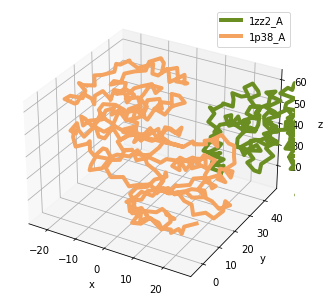

In [50]:
showProtein(bnd_chA);
showProtein(apo_chA);
legend();

After superposition, the RMSD will be much improved,

In [51]:
bnd_chA, transformation = superpose(bnd_chA, apo_chA)
calcRMSD(bnd_chA, apo_chA)

@> WARNING mobile is an AtomMap instance, consider assign weights=mobile.getFlags("mapped") if there are dummy atoms in mobile
@> WARNING target is an AtomMap instance, consider assign weights=target.getFlags("mapped") if there are dummy atoms in target


1.862801490869549

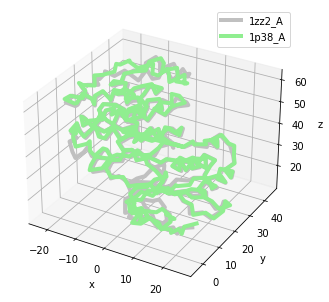

In [52]:
showProtein(bnd_chA);
showProtein(apo_chA);
legend();

We can also visualize the superposition of the full proteins as the transform matrix is applied to the entire structure:

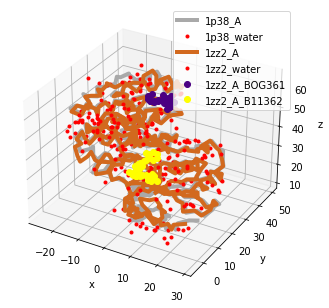

In [53]:
showProtein(p38);
showProtein(bound);
legend();

# Advanced Visualization

Using `matplotlib`, we only obtained a very simple linear representation of proteins. ProDy also supports a more sophisticated way of visualizing proteins in 3D via [py3Dmol](http://3dmol.csb.pitt.edu/):

In [54]:
import py3Dmol
showProtein(p38)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

The limitation is that `py3Dmol` only works in an iPython notebook. You can always write out the protein to a PDB file and visualize it in an external program:

In [55]:
writePDB('bound_aligned.pdb', bnd_chA)

'bound_aligned.pdb'